In [3]:
import os
import json
import pickle
import numpy as np
import glob
import random 

import pandas as pd
import matplotlib.pyplot as plt
from platform import python_version

print(python_version())

3.7.3


In [2]:
(dirpath, dirnames, filenames) = next(os.walk('../datasets/books-pickle/'), (None, None, []))
filenames

['df4.pkl',
 'df2.pkl',
 'df5.pkl',
 'item_stats.pkl',
 'df3.pkl',
 'df0.pkl',
 'df1.pkl',
 'pytorch_model.bin',
 'user_stats.pkl',
 'df.pkl',
 'config.json',
 'encoded_text.pkl']

In [3]:
books_path = '../datasets/Books_5.json.gz'
pkl_path = '../datasets/books-pickle/'

with open(pkl_path + "df.pkl", 'rb') as fin:
    df = pickle.load(fin)

with open(pkl_path + "user_stats.pkl", 'rb') as fin:
    user_dict = pickle.load(fin)
    
with open(pkl_path + "item_stats.pkl", 'rb') as fin:
    item_dict = pickle.load(fin)

In [4]:
user_df = pd.DataFrame.from_dict(user_dict, orient='index')
item_df = pd.DataFrame.from_dict(item_dict, orient='index')

In [5]:
print("Number of unique reviewers: {}".format(len(user_dict.keys())))
print("Number of unique items: {}".format(len(item_dict.keys())))


Number of unique reviewers: 8908
Number of unique items: 88


In [6]:
list(user_dict.keys())[0]

'A0334855HN6E38CXWXZR'

In [7]:
user_df.head()

,n_reviews,m_rating,m_words
A0334855HN6E38CXWXZR,1,5.0,12.0
A0790722OCX87RKL2J3T,1,5.0,71.0
A100JBBLCC0NUC,1,5.0,27.0
A101OKMJFCIWYH,2,5.0,26.0
A1022R52JDJVMA,1,5.0,58.0


In [8]:
item_df.head()

,n_reviews,m_rating,m_words
0000013765,3,5.000000,36.666667
0000230022,8,5.000000,52.375000
0000913154,4,5.000000,89.750000
0001046519,15,4.866667,21.733333
0001047566,25,4.000000,139.120000


Mean: 1.12
Median: 1.0
Std: 0.61


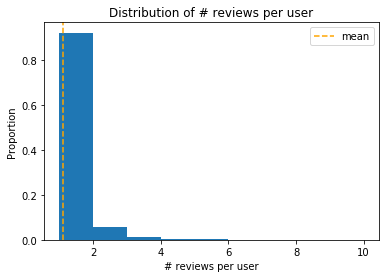

In [9]:
#reviews per user
plt.hist(user_df['n_reviews'], bins=[1,2,3,4,6,10], density=True)
plt.axvline(user_df['n_reviews'].mean(), color='orange', linestyle='--', label='mean')

plt.xlabel('# reviews per user')
plt.ylabel('Proportion')
plt.title('Distribution of # reviews per user')

plt.legend()

print("Mean: %.2f" % user_df['n_reviews'].mean())
print("Median: %.1f" % user_df['n_reviews'].median())
print("Std: %.2f" % user_df['n_reviews'].std())

In [10]:
min_reviews = 3
print("Users with more than {} reviews: {}".format(min_reviews, user_df[user_df['n_reviews'] > min_reviews]['n_reviews'].count()))
print("That's only {} %".format(user_df[user_df['n_reviews'] > min_reviews]['n_reviews'].count() / len(user_df)*100))

Users with more than 3 reviews: 94
That's only 1.055231252806466 %


Mean: 88.84
Std: 136.01
Median: 41.0
Min: 0.0


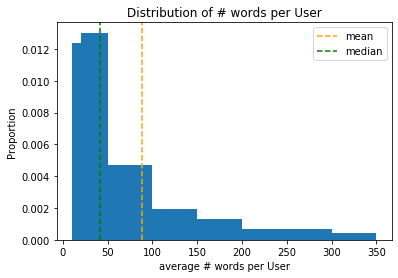

In [11]:
plt.hist(user_df['m_words'], bins=[10, 20, 50, 100, 150, 200, 300, 350], density=True)
plt.axvline(user_df['m_words'].mean(), color='orange', linestyle='--', label='mean')
plt.axvline(user_df['m_words'].median(), color='green', linestyle='--', label='median')


print("Mean: %.2f" % user_df['m_words'].mean())
print("Std: %.2f" % user_df['m_words'].std())
print("Median: %.1f" % user_df['m_words'].median())
print("Min: %.1f" % user_df['m_words'].min())

plt.xlabel('average # words per User')
plt.ylabel('Proportion')
plt.title('Distribution of # words per User')
plt.legend()

In [12]:
#m_words per user
def plot_words_per_user(user_df, bins=[10, 20, 50, 100, 150, 200, 300, 350], density=True):
    plt.hist(user_df['m_words'], bins=bins, density=density)
    plt.axvline(user_df['m_words'].mean(), color='orange', linestyle='--', label='mean')
    plt.axvline(user_df['m_words'].median(), color='green', linestyle='--', label='median')


    print("Mean: %.2f" % user_df['m_words'].mean())
    print("Std: %.2f" % user_df['m_words'].std())
    print("Median: %.1f" % user_df['m_words'].median())
    print("Min: %.1f" % user_df['m_words'].min())
    print("Max: %.1f" % user_df['m_words'].max())

    plt.xlabel('average # words per User')
    plt.ylabel('Proportion')
    plt.title('Distribution of # words per User')
    plt.legend()

In [13]:
def plot_per_key(df, key, bins, density=True):
    plt.hist(df[key], bins=bins, density=density)
    plt.axvline(df[key].mean(), color='orange', linestyle='--', label='mean')
    plt.axvline(df[key].median(), color='green', linestyle='--', label='median')


    print("Mean: %.2f" % df[key].mean())
    print("Std: %.2f" % df[key].std())
    print("Median: %.1f" % df[key].median())
    print("Min: %.1f" % df[key].min())
    print("Max: %.1f" % df[key].max())

    plt.xlabel('{}'.format(key))
    plt.ylabel('Proportion')
    plt.title('Distribution of {}'.format(key))
    plt.legend()

In [14]:
min_words = 90
print("Users with more than {} average words per review: {}".format(min_words, user_df[user_df['m_words'] > min_words]['n_reviews'].count()))
print("That's {}% of all users".format(user_df[user_df['m_words'] > min_words]['n_reviews'].count() / len(user_df)*100))

Users with more than 90 average words per review: 2395
That's 26.88594521778177% of all users


2194
Mean: 255.29
Std: 190.83
Median: 192.3
Min: 101.0
Max: 2116.0


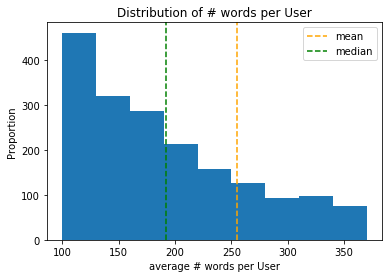

In [15]:
min_words = 100
user_subset = user_df[user_df['m_words'] > min_words]
print(len(user_subset))
#bins=np.geomspace(min_words, int(user_subset['m_words'].max()), 7)

plot_words_per_user(user_subset, bins=range(min_words, 400, 30), density=0)

32
Mean: 7.50
Std: 4.62
Median: 6.0
Min: 5.0
Max: 27.0


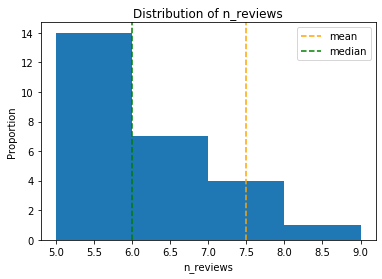

In [16]:
min_reviews = 5
user_subset = user_df[user_df['n_reviews'] >= min_reviews]
print(len(user_subset))
plot_per_key(user_subset, key='n_reviews', bins=range(min_reviews, 10, 1), density=0)

In [17]:
user_subset = user_df[user_df['n_reviews'] > min_reviews]

## Items

Mean: 113.64
Std: 328.94
Median: 26.5
Min: 1.0
Max: 2753.0


Text(0.5, 1.0, 'Distribution of # reviews per Item')

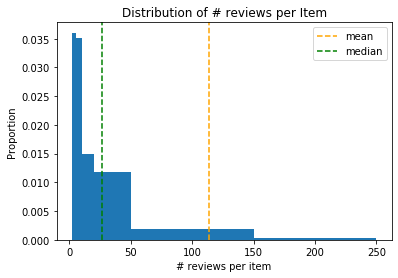

In [20]:
plot_per_key(item_df, key='n_reviews', bins=[2,5,10, 20, 50, 150, 250])
plt.xlabel('# reviews per item')
plt.ylabel('Proportion')
plt.title('Distribution of # reviews per Item')

Mean: 103.33
Std: 69.10
Median: 82.0
Min: 21.7
Max: 427.7


Text(0.5, 1.0, 'Distribution of # words per Item')

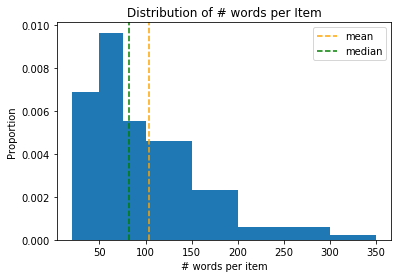

In [19]:
plot_per_key(item_df, key='m_words', bins=[20, 50, 75, 100, 150, 200, 300, 350], density=True)
plt.xlabel('# words per item')
plt.ylabel('Proportion')
plt.title('Distribution of # words per Item')